# Анализ данных о компьютерных играх

## Введение
<br>Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать
ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
<br>В рамках проекта предстоит провести исследовательский анализ данных. <i>[Ознакомится с данными](#Ознакомление-с-данными)</i> и <i>[подготовить их к дальнейшему анализу](#Предобработка-данных)</i> (преобразовать тип данных, обработать пропуски, рассчитать суммарные продажи во всех регионах). В <i>[исследовательском анализе](#analysis)</i> изучить данные по выпуску игр по годам, изменение продаж в зависимости от типа платформы. Основываясь на актуальные данные выявить лидирующие платформы, построить диаграммы размаха по продажам игр в разбивке по платформам, изучить влияние отзывов пользователей и критиков на продажи и рассмотреть общее распределение игр по жанрам.
<br>Также <i>[составим портрет пользователя для каждого региона](#rating)</i> и <i>[проверим ряд гипотез](#hypothesis)</i>.

## Ознакомление с данными

Импортируем необходимые библлиотеки, откроем датасет и сохраним в переменную `data`. Вывкдем на экран первые пять строк и общую информацию о датасете.

In [255]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

In [256]:
data = pd.read_csv('/content/games.csv')

In [257]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7018,Megamind: Mega Team Unite,Wii,2010.0,Adventure,0.15,0.06,0.0,0.02,NaN,tbd,E10+
10668,Little League World Series Baseball 2010,X360,2010.0,Sports,0.09,0.00,0.0,0.01,55.0,tbd,E
5405,F.E.A.R.,X360,2006.0,Shooter,0.28,0.03,0.0,0.03,85.0,7.3,M
9571,Pokémon: For Ho-Oh the Bells Toll!: Game Boy A...,GBA,2004.0,Misc,0.09,0.03,0.0,0.00,NaN,NaN,NaN
8649,FIFA Soccer 97,PS,1996.0,Sports,0.09,0.06,0.0,0.01,NaN,NaN,NaN


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В датасете 16715 строк и 11 столбцов.

Для дальнейшего анализа необходимо:
- привести к нижнему регистру названия столбцов;
- изучить и обработать пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;
- изменить тип данных в столбцах `Year_of_Release` на int64 и `User_Score` на float64.

Проверим наличие явных дубликатов. И наличие неявных дубликатов в столбцах `Platform`, `Genre` и `Rating`.

In [259]:
data.duplicated().sum()

0

In [260]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [261]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [262]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столюцах `Platform` и `Genre` дубликаты отсутствуют, а в столбце `Rating` присутствуют неявные дубликаты - первоначально рейтинг `E` - <i>"everyone"</i> назывался `K-A` - <i>"kids to adults"</i>. Заменим рейтинг `K-A` на  `E`.

In [263]:
data['Rating'] = data['Rating'].replace('K-A', 'E')

И перейдем к предварительной обработке данных.

## Предобработка данных

### Замена названий столбцов

В соответствии с рекомендациями PEP8 и во избежании возникновения ошибок приведем наименование столбцов к нижнему регистру.

In [264]:
data.columns = data.columns.str.lower()

### Обработка пропусков

In [265]:
# Подсчет количества пропусков в каждом столбце
missing_values_count = data.isnull().sum()

# Сохраним исходный датафрейм в отдельную переменную
data_with_null = data.copy()

# Подсчет процентного соотношения пропусков в каждом столбце
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Соединяем оба показателя в один DataFrame для удобства анализа
missing_values_analysis = pd.DataFrame({'Количество пропусков': missing_values_count,
                                        'Процент пропусков': missing_values_percentage})

missing_values_analysis[missing_values_analysis['Количество пропусков'] > 0]

,Количество пропусков,Процент пропусков
name,2,0.011965
year_of_release,269,1.609333
genre,2,0.011965
critic_score,8578,51.319174
user_score,6701,40.089740
rating,6766,40.478612


#### Обработка пропусков в столбцах `name` и `genre`

In [266]:
data[data['name'].isna() & data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски столбцов `name` и `genre` находятся в одних и тех же строках и составляют менее 0,01%. Удалим данные строки, так как данных для их восстановления недостаточно.

In [267]:
data = data.dropna(subset=['name']).reset_index(drop=True)

#### Обработка пропусков в столбце `year_of_release`

In [268]:
pass_year = data['year_of_release'].isna().mean()

print(f'Доля пропусков в столбце "year_of_release" составляет {pass_year.round(3)}.')

Доля пропусков в столбце "year_of_release" составляет 0.016.


В данном столбце пропусков не более 1,6%. Можно было бы удалить эти строки, либо заполнить значениями-маркерами, но сначала попробуем заменить их с помощью имеющихся данных. Выведем часть строк с пропусками.

In [269]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Проверим, возможно ли восстановить год выпуска игры на основании данных для игры на других платформах. Выведем данные о трех играх и сравним годы выпуска на разных платформах.

In [270]:
data[data['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2605,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12028,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13085,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [271]:
data[data['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4263,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8579,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10382,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [272]:
data[data['name'] == 'Call of Duty 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,Call of Duty 3,X360,2006.0,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1254,Call of Duty 3,PS3,2006.0,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T
1914,Call of Duty 3,PS2,2006.0,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T


В двух играх из трех годы выпуска на трех платформах совпадают. Допустим, что в случае, когда год выпуска игры для остальных платформ одинаков, он будет аналогичным и для платформы, с порпущенным значением. Для этого пройдемся циклом по каждой игре с пропуском в столбце года выпуска и сравним известный год выпуска с медианным значением года для этой игры. В случае, если они будут равны запишем это значение в ячейку.
Если год выпуска для разных платформ не совпадает, или если по игре нет информации оставим пропуски.

Стоит отметить, что заполнение пропусков в столбцах с оценкой критиков и пользователей таким же способом некорректно. Как видим из примеров, для одной и то же игры на разных платформах может быть разный рейтинг.

In [273]:
# В переменную list_of_games сохраняем список из названия игр, у которых встречаются пропуски в столбце year_of_release
games_list = data[data['year_of_release'].isna()]['name'].to_list()
games_list = list(set(games_list))

# Циклом проходимся по списку названий игр
        # В переменную non_nul_year_for_game сохраняем строки с ненулевым значением года для каждой игры
        # В переменную year_of_release сохраняем год релиза для каждой игры
        # В переменную mean_value сохраняем среднее значение года выпуска каждой игры
        # Если год выпуска в одной из строк равен среднему значению, допускаем, что все годы одинаковы
            # Вытащим номер столбца year_of_release и сохраним в переменной column_number
                # Вытаскиваем индекс строки, для того, чтобы записать в неё значение переменной year_of_release
for game in games_list:
    try:
        non_nul_year_for_game = data[(data['year_of_release'].isna() == False) & (data['name'] == game)]
        year_of_release = non_nul_year_for_game['year_of_release'].iloc[0]
        mean_value = non_nul_year_for_game['year_of_release'].mean()
        if mean_value == year_of_release:
            column_number = data.columns.to_list().index('year_of_release')
            for i in data[(data['year_of_release'].isna()) & (data['name'] == game)]['year_of_release'].index:
                data.iloc[i, column_number] = year_of_release
    except:
        pass

# Выведем количество строк с пропусками
still_nan = data['year_of_release'].isna().sum()
print(f'Количество строк с пропущенными значениями после заполнения пропусков - {still_nan}.')

Количество строк с пропущенными значениями после заполнения пропусков - 158.


Таким образом удалось заполнить 111 строк. Остальные значения оставим без заполнения.

#### Обработка пропусков в столбцах `critic_score`, `user_score` и `rating`

Рассчитаем долю пропусков в столбцах.

In [274]:
pass_critic = data['critic_score'].isna().mean()
pass_user =  data['user_score'].isna().mean()
pass_rating =  data['rating'].isna().mean()

print(f'Доля пропусков в столбце "critic_score" составляет {pass_critic.round(3)}.')
print(f'Доля пропусков в столбце "user_score" составляет {pass_user.round(3)}.')
print(f'Доля пропусков в столбце "rating" составляет {pass_rating.round(3)}.')

Доля пропусков в столбце "critic_score" составляет 0.513.
Доля пропусков в столбце "user_score" составляет 0.401.
Доля пропусков в столбце "rating" составляет 0.405.


Число пропусков в каждом столбце превышает 40%. Заполнить пропуски без искажения данных не получится, поэтому оставим их без заполнения.

В столбце `user_score` встречаются значения "tbd" - <i>"to be decided"</i> или <i>"to be determined"</i> - <i>"к решению"</i> или <i>"к определению"</i>. Оценка пользователей ещё не определена. Заменим данные значения на NaN.

In [275]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Пропущенные значения в столбце `rating` для возможности дальнейшего анализа заменим на заглушку Unknown.

In [276]:
data['rating'] = data['rating'].fillna('unknown')

### Преобразование типов данных

В столбце `year_of_release` содержится информация о годе выпуска игры, в столбце `user_score` - данные об оценке пользователей. Изменим типы столбцов на int64 и float64  соответственно.

In [277]:
data = data.astype({'year_of_release': 'Int64', 'user_score': 'float'})

### Рассчет суммарных продаж во всех регионах

Создадим столбец `total_sales` в котором сохраним сумму продаж по всем регионам.

In [278]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных <a id='analysis'></a>

### Количество выпущенных игр по годам

Посмотрим, сколько игр выпускалось в разные годы.

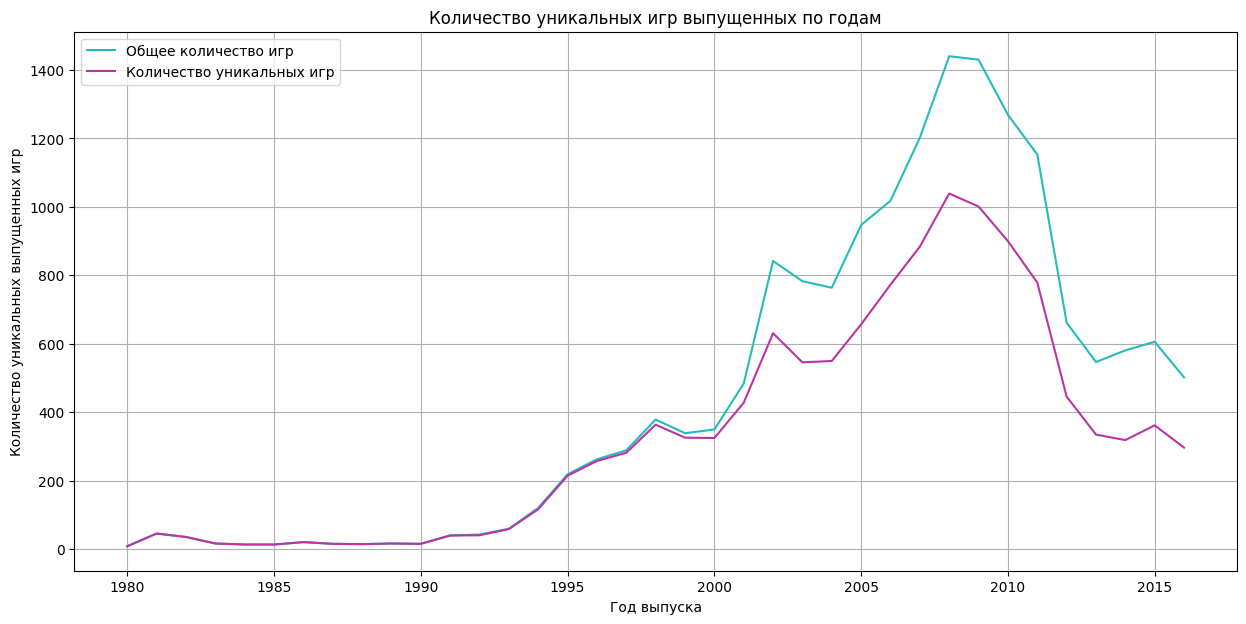

In [279]:
games_per_year = data.groupby('year_of_release')['name'].count()  # Общее количество игр по годам

unique_games_per_year = data.groupby(['year_of_release', 'name'],
                                          as_index=False)[['name']].count()  # Сгруппируем данные по годам и играм
unique_games = unique_games_per_year.groupby('year_of_release')['name'].count()  # Количество уникальных игр по годам

games_per_year.plot(title='Количество выпущенных игр по годам',
                    figsize=(15,7),
                    grid=True,
                    xlabel='Год выпуска',
                    ylabel='Количество выпущенных игр',
                    color='#25BBBB',
                    label='Общее количество игр',
                    legend=True);

unique_games.plot(title='Количество уникальных игр выпущенных по годам',
                    figsize=(15,7),
                    grid=True,
                    xlabel='Год выпуска',
                    ylabel='Количество уникальных выпущенных игр',
                    color='#BD33A4',
                    label='Количество уникальных игр',
                    legend=True);


На графике видно, что в период с 1980 по 1990 количество игр, выпускаемых за год находилось очень близко к нулувой отметке, непревышая 50 единиц и только с 1993 года начинается активное развитие индустрии игр. Самый стремительный рост произошел в период с 2000 по 2002 год, когда за 2 года количество выпущенных игр выросло с 350 до 842 штук. Примерно в это же время происходит рост количества игр с 3D графикой. Максимальное количество выпущенных игр приходится на 2008 - 2009 годы, после чего произошел спад до уровней 2000 - 2001 годов.

Предположу, что такой сильный спад произошел в результате кризиса 2008 года в США. В связи с массовымми сркращениями потребительская способность сильно снизалась. Отток инвесторов привел к снижению стоимости акций крупных игровых компаний более чем на 50% (EA Games с 48 USD до 20 USD за акцию, Nintendo с 6130 йен до 3000 йен и продолжило падении до конца 2012 года, Take-Two с 26USD до 12USD). И, как следствие, сокращению бюджетов на разработку. Только к концу 2013 - началу 2014 года их акции снова начинают расти в цене, что хорошо коррелирует с графиком выше.

Стоит отметить, что с 2007 года начинается массовый выпуск iPhone, с 2010 года - выпуск iPad и дальнейшее развитие рынка мобильных игр, что также перетягивает часть аудитории.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Два графика имеют общую тенденцию. До 1997 года полностью дублирубт друг друга, что говорит о том, что игры выпускались под одну консоль. Начиная с 1997 графики разделяются, начинает развиваться рынок платформ, как следствие, одна и та же игра выпускается несколько раз под разные платфрмы. И к 2008 году достиганм максимальной разницы между этими показателями(одна игра - несколько выпусков под разные консоли). Если смотреть по графику выпуска уникальных игр, то спад после 2009 года происходил поавнее, чем на графике по общему количеству, но тенденция на сокращение выпуска игр после 2011 года видна на обоих графиках. </div>

### Продажи игр, в зависимости от платформы

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [280]:
sales_per_platform = data.groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)

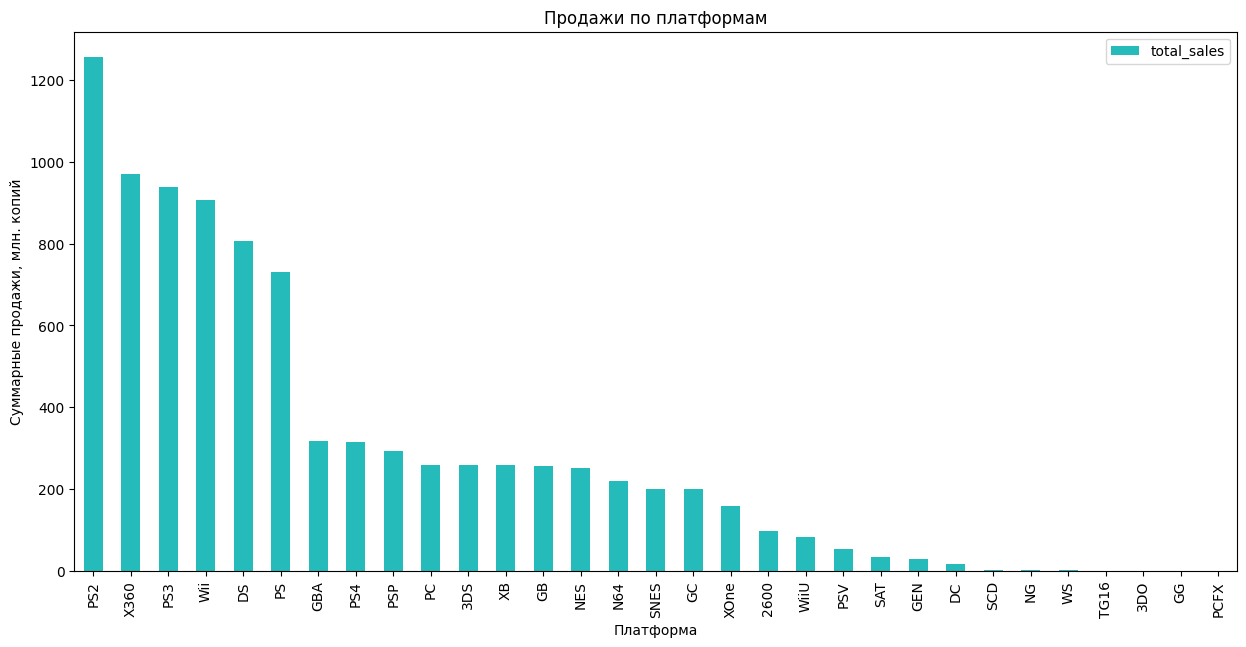

In [281]:
sales_per_platform.plot(kind='bar', figsize=(15, 7),
                        title='Продажи по платформам',
                        xlabel='Платформа',
                        ylabel='Суммарные продажи, млн. копий',
                        color='#25BBBB');

Наибольшее число продаж у платформ Play Station 2, Xbox 360, Play Station 3, Wii, Nintendo DS и Play Station.

При этом можно считать платформу Play Station одной из наиболее успешных. Спустя почти 13 лет с момента выхода последней игры она по прежнему держится в топ 6 по общему числу проданых игр.

Построим график распределения продаж по годам для каждой из 6 платформ с максимальными продажами.

In [282]:
top_sales_platform = sales_per_platform.head(6).index.to_list()  # Сохраним обозначение платформ в список
additional = ['PS4', 'XOne', 'PC', '3DS']
for add in additional:  # И добавтм к нему 3 дополнительные платформы
    top_sales_platform.append(add)

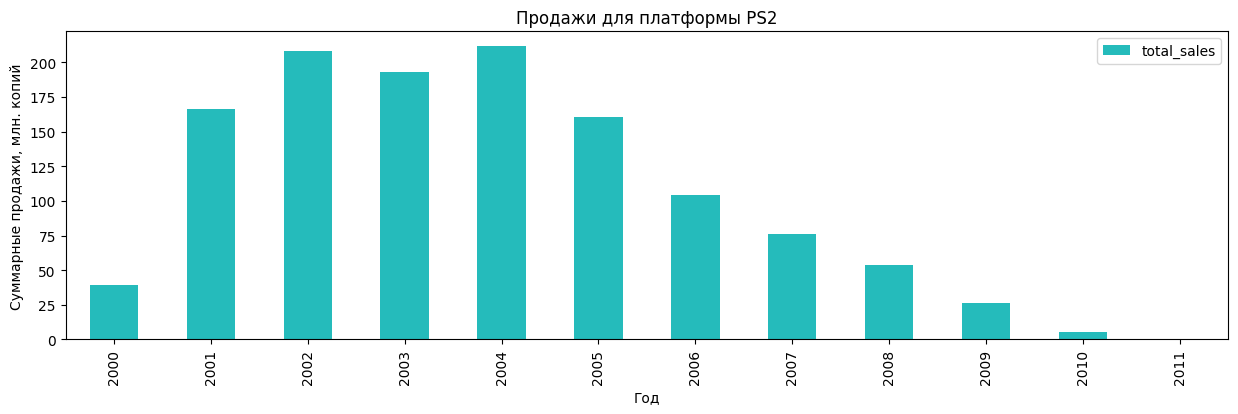

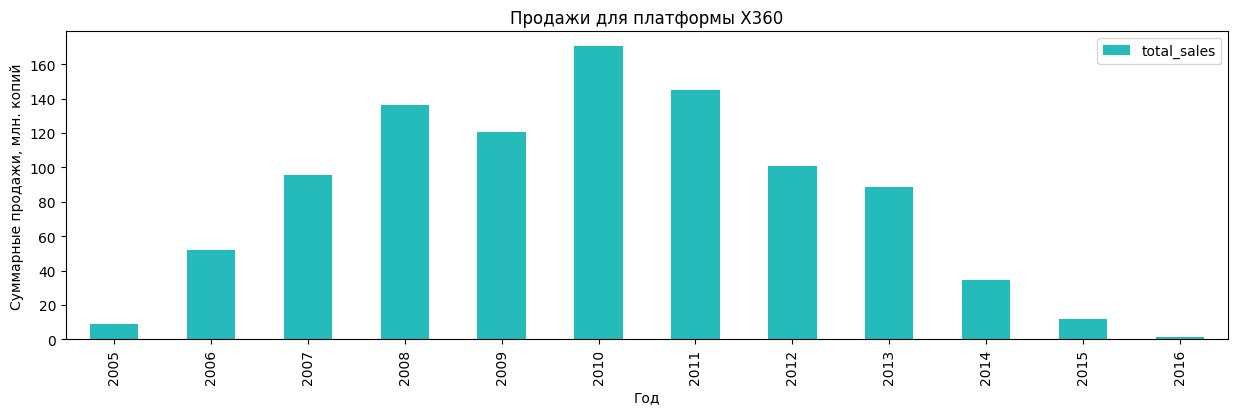

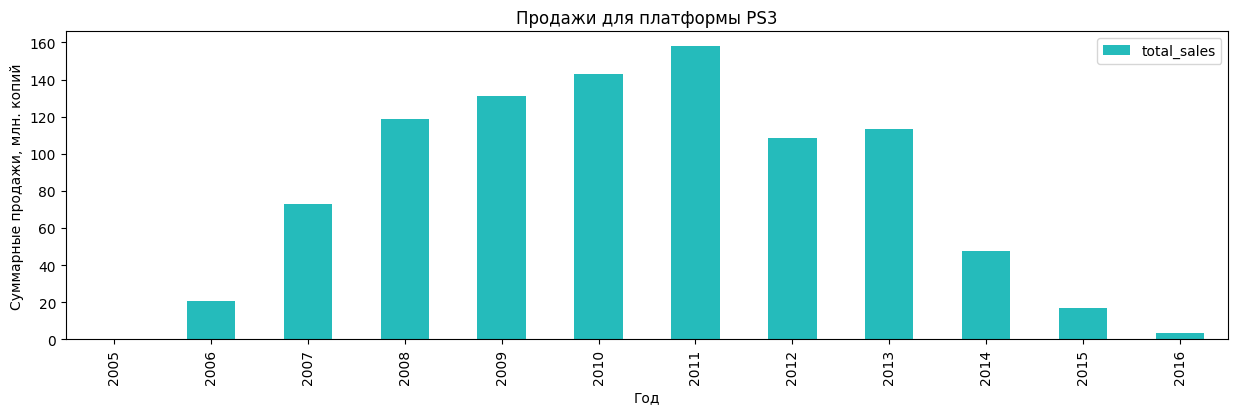

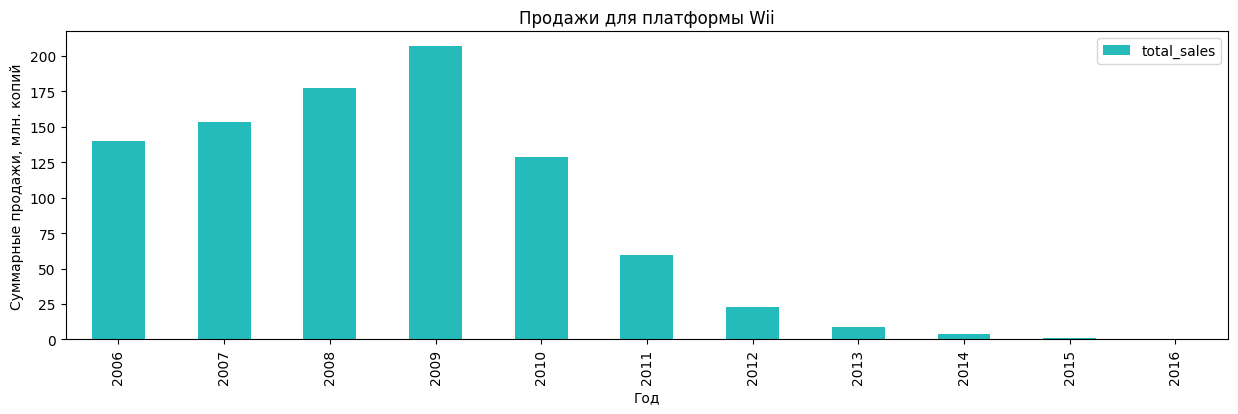

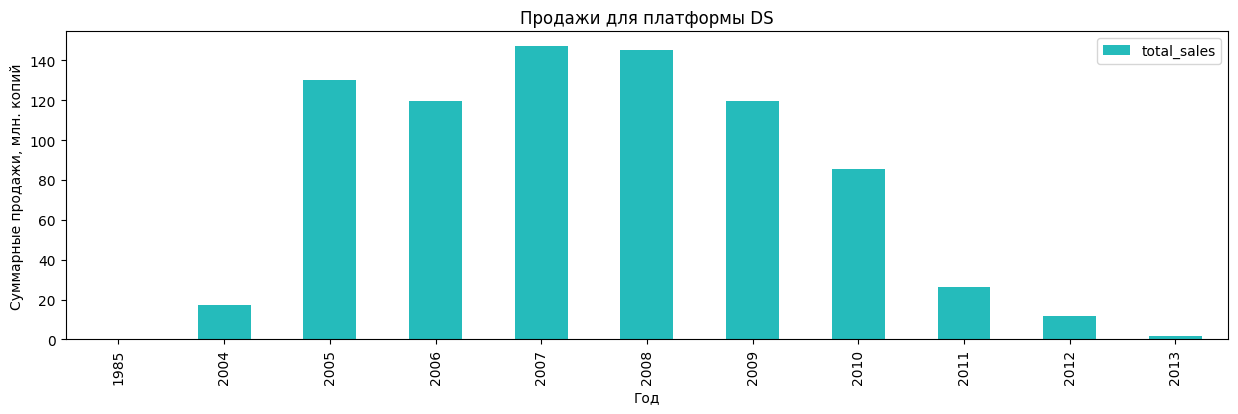

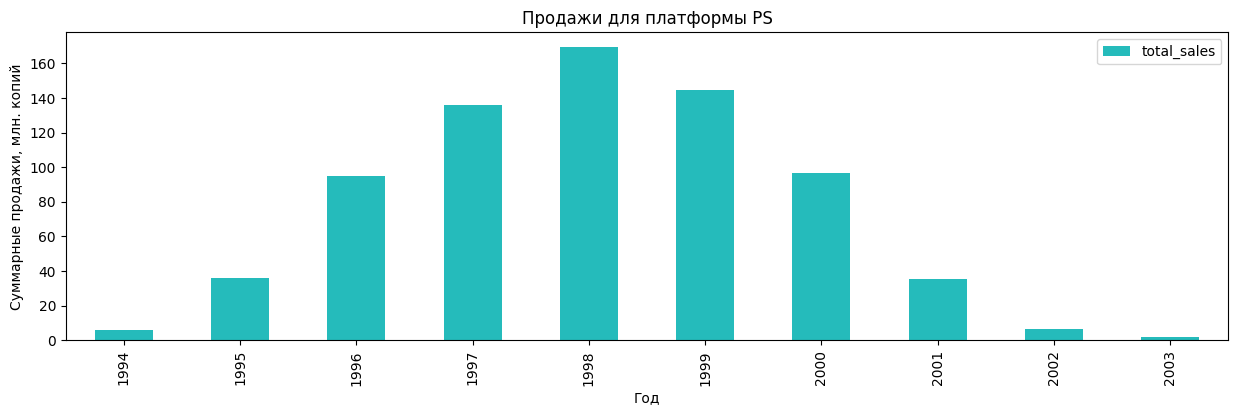

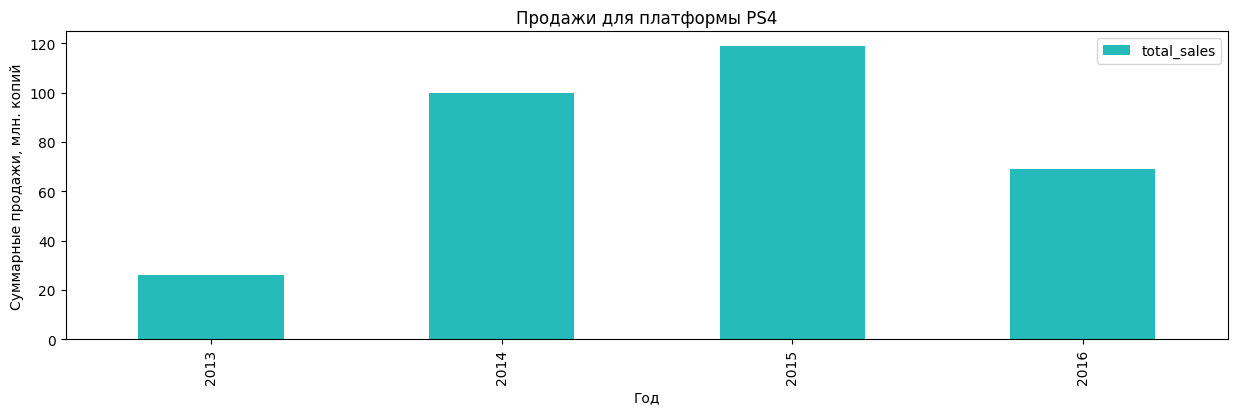

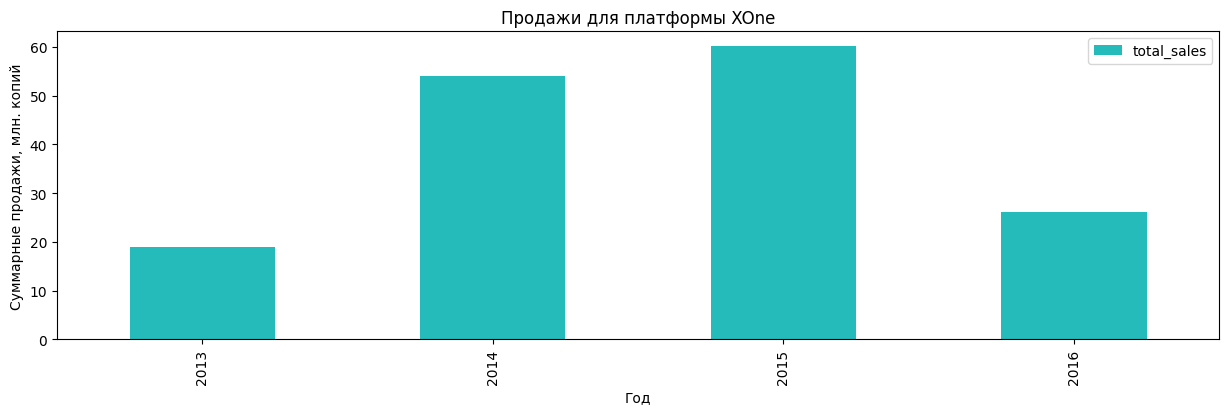

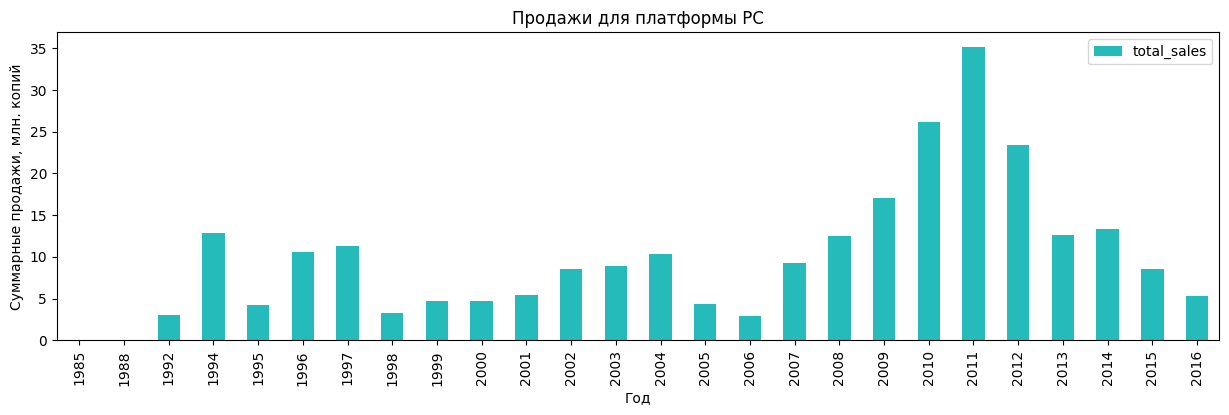

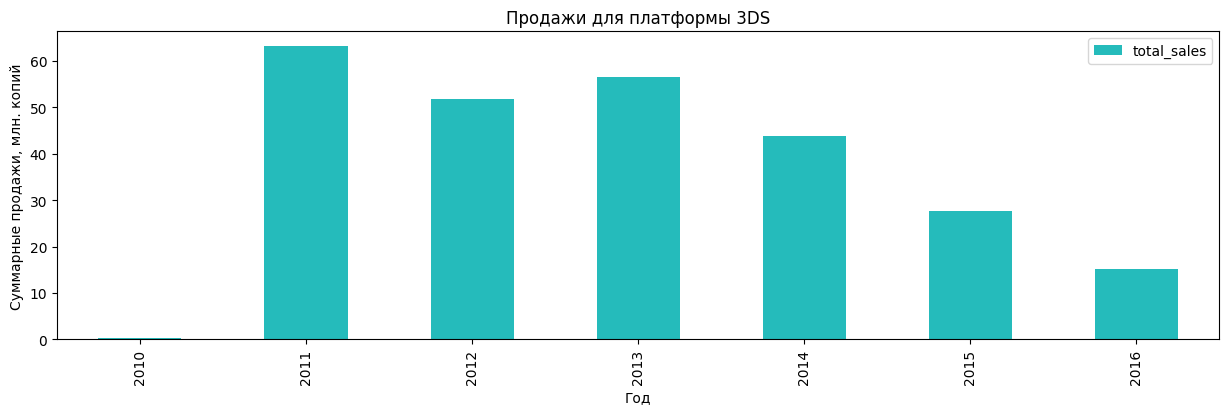

In [283]:
for platform in top_sales_platform:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'
                                                  ).plot(kind='bar', figsize=(15, 4), color='#25BBBB', xlabel='Год')
    plt.ylabel('Суммарные продажи, млн. копий')
    plt.title('Продажи для платформы ' + platform)

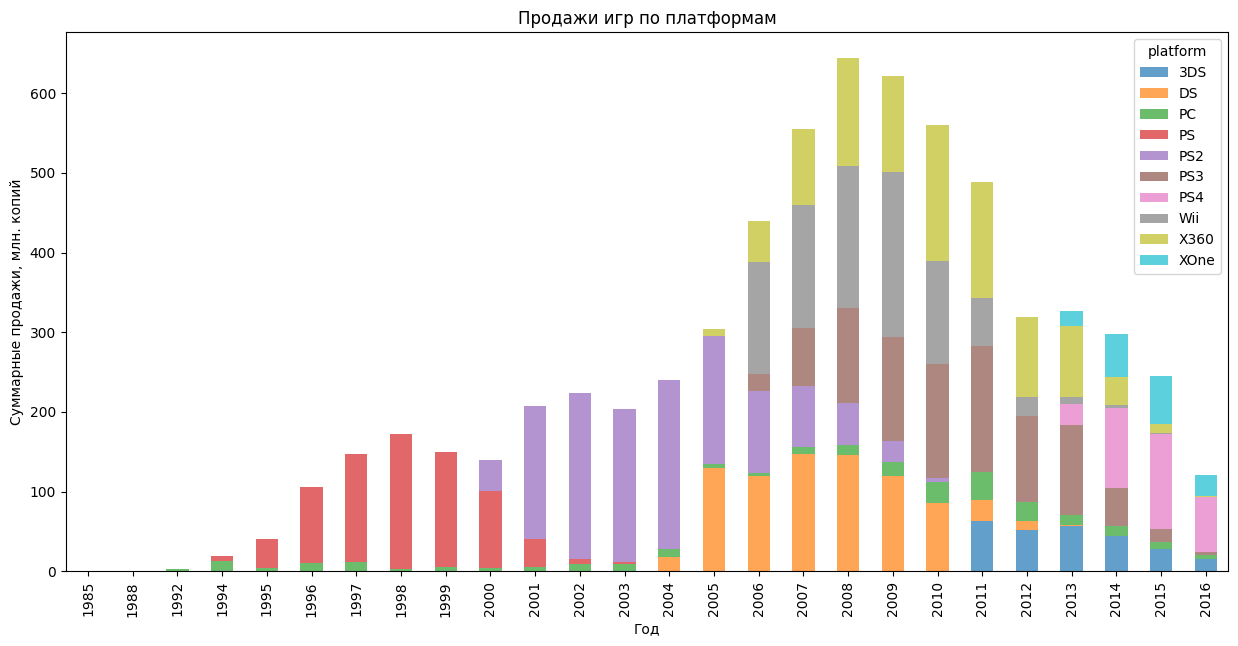

In [284]:
data_grouped = (data[data['platform']
                     .isin(top_sales_platform)]
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

data_grouped.plot(kind='bar',
                  stacked= True,
                  figsize=(15,7), alpha=0.7,
                  title='Продажи игр по платформам', xlabel='Год');
plt.ylabel('Суммарные продажи, млн. копий');

Как видно из графиков платформы в среднем "живут" около 10 лет и большинство имеет нормальное распределение. На примере Play Station (1994 - 2003, пик - 1998), Play Station 2(2000 - 2010, пик - 2002-2004) и Play Station 3(2006 - 2016, пик - 2011) заметно, что через 2 года после начала снижения продаж выходит новая версия приставки, что приводит к ускорению снижения спроса на старую версию. При этом, сами приставки с максимальным числом проданных игр уже нельзя считать актуальными, по состоянию на 2016 год они имеют около нулевые  показатели продаж. К ним на смену проходят такие платформы как 3DS(2010), Play Station
4(2013) и Xbox One(2013), которые только начинают набирать обороты продаж. Не стоит исключать из этого списка и ПК.

Для дальнейшего анализа оставим данные за последние 8 лет (начиная с 2009 года).

На графике платформы DS заметна аномалия в данных. В 1985 году для игры "Strongest Tokyo University Shogi DS" указана платформа Nintendo DS, хотя она была выпущена только в 2004 году. Вероятно произошла ошибка при сборе информации.

<i>(Это никак не связано с выполненной заменой года, т.к. строка была в таком виде изначально)</i>

In [285]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


### Анализ динамики продаж по платформам

Построим линейный график сравнения продаж по каждой платформе за последние <div class = "alert alert-info" style="border-left: 7px solid blue"> 4 года.</div> (~~8 лет~~)

In [286]:
year_relevant = data[data['year_of_release'] > 2011].copy()

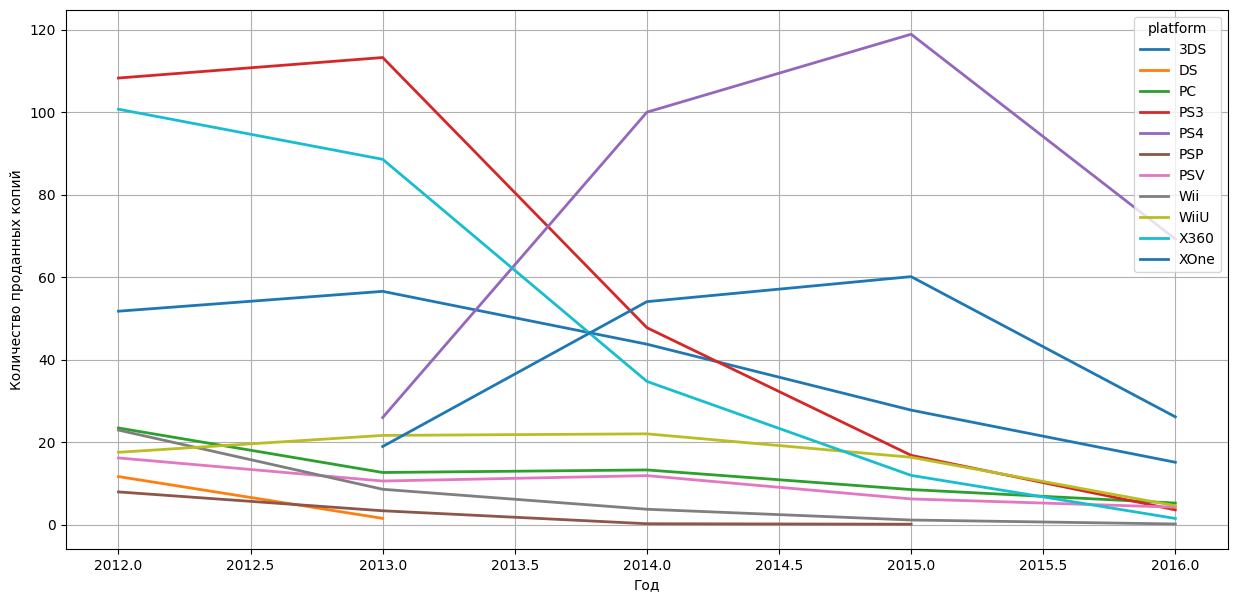

In [287]:
sales_per_platform = year_relevant.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_per_platform.plot(figsize=(15, 7), grid=True, linewidth=2, xlabel='Год');
plt.ylabel('Количество проданных копий');

По состоянию на 2016 год основными игроками являются Play Station 4 и Xbox One. Так как данные за 2016 год неполные, нельзя говорить о снижении объема продаж, который виден на графике. Nintendo 3DS занимает третье место по объемам продаж, но принимая во внимание средний срок "жизни" консоли, находится на завершающем этапе этого цикла.

### Диаграммы размаха по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Для этого в переменную top_relevant_platform сохраним список из платформ, с максимальными продажами за последние 8 лет и в переменной data_relevant оставим только актуальные данные для дальнейшего анализа.

In [288]:
top_relevant_platform = (year_relevant.groupby('platform')['total_sales']
                         .sum().sort_values(ascending=False)
                         .head(8).index.to_list())

data_relevant = year_relevant[year_relevant['platform'].isin(top_relevant_platform)].copy()

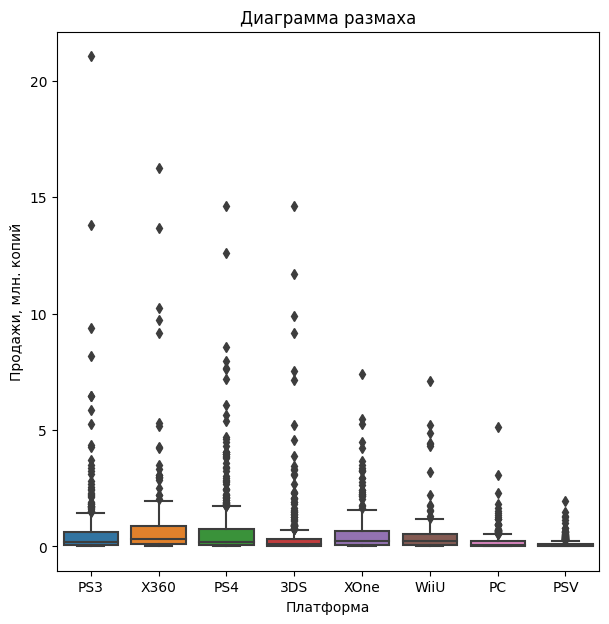

In [289]:
plt.figure(figsize=(7,7));
sns.boxplot(x=data_relevant['platform'], y=data_relevant['total_sales']);
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграмма размаха');

In [290]:
data_relevant[data_relevant['total_sales'] > 10].sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<div class = "alert alert-info" style="border-left: 7px solid blue"> Для каждой платформы встречаются выбросы - игры, который продавались лучше других. Самой продаваемой игрой для платформ PS3 и Xbox стала GTA V. Для PS4 - 	Call of Duty: Black Ops 3. </div>

Выведем описание данных для столбца `total_sales` и построим диаграмму размаха, ограничив значения по оси Y (скроем часть выбросов).

In [291]:
data_relevant['total_sales'].describe()

count    2636.000000
mean        0.527401
std         1.282139
min         0.010000
25%         0.040000
50%         0.140000
75%         0.460000
max        21.050000
Name: total_sales, dtype: float64

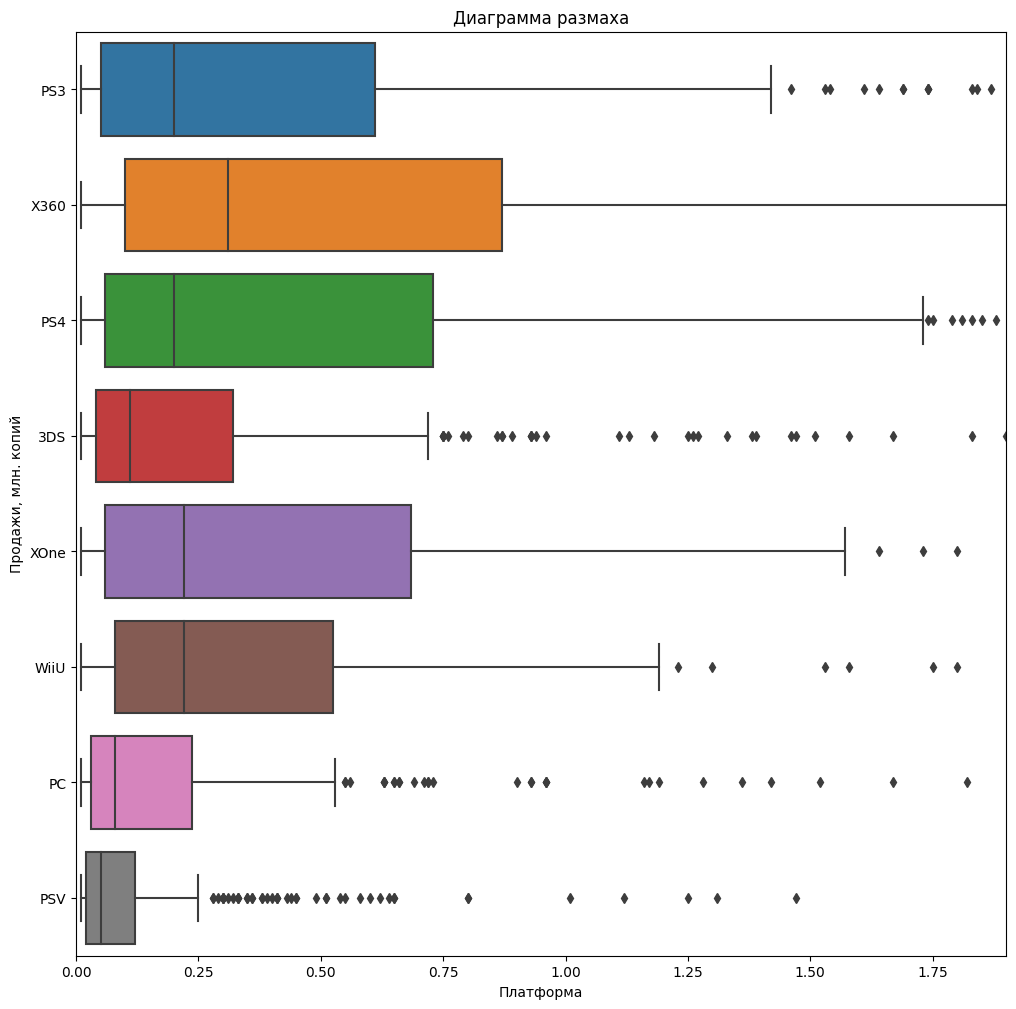

In [292]:
plt.figure(figsize=(12,12));
sns.boxplot(y=data_relevant['platform'], x=data_relevant['total_sales']);
plt.xlabel('Платформа')
plt.xlim(0, 1.9)
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграмма размаха');

Наибольшее медианное значение количества проданных копий игр у платформы Xbox 360, чуть отстает Play Station 3, Xbox One, Play Station 4 и The Wii. Наибольшее количество "удачных" игр также у Xbox 360, затем, не смотря на недавний релиз платформы - Play Station 4, затем Play Station 3 и Xbox One. Если рассмотривать только 50% от проданных игр, попадающих между Q1 и Q2, то и в этом случае максималные показатели у Xbox 360 и Play Station 4, но у Xbox 360 успешных игр немного больше. Платформы Play Station 3 и Xbox One имеют примерно одинаковые значения.

По всем параметрам наименьшие показатели у PC.

### Корреляция отзывов и продаж

Рассчитаем корреляцию между отзывами и продажами и построим диаграмму рассеяния.

In [293]:
data_relevant['total_sales'].corr(data_relevant['critic_score'])

0.30990503233856154

In [294]:
data_relevant['total_sales'].corr(data_relevant['user_score'])

0.0020217569549693436

Если посчитать корреляцию для всего датасета, можно сказать что связь между отзывами пользователей и продажами практически отсутствет, между отзывами критиков и продажами - слабая прямая зависимость.

Проверим корреляцию для платформы PS4, с максимальным числом проданных игр.

In [295]:
print('Для платформы PS4')
print(data_relevant[data_relevant['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']].corr())

Для платформы PS4
              total_sales  user_score  critic_score
total_sales      1.000000   -0.031957      0.406568
user_score      -0.031957    1.000000      0.557654
critic_score     0.406568    0.557654      1.000000


Получившиеся данные подтвверждают ранее расчитанную корреляцию. Прослеживается слабая прямая зависимость между продажами и рейтингами критиков, однка для выбранной платформы она заметно больше (0,40). Что говорит нам о наличии более слабых связей для некоторых консолей.

Отметим, что не смотря на отсутсвие взаимосвязи между оценкой пользователей и продажами, существует умеренная зависимость между оценками критиков и пользователей.

Построим диаграмму рассеивания для Play Station 4.

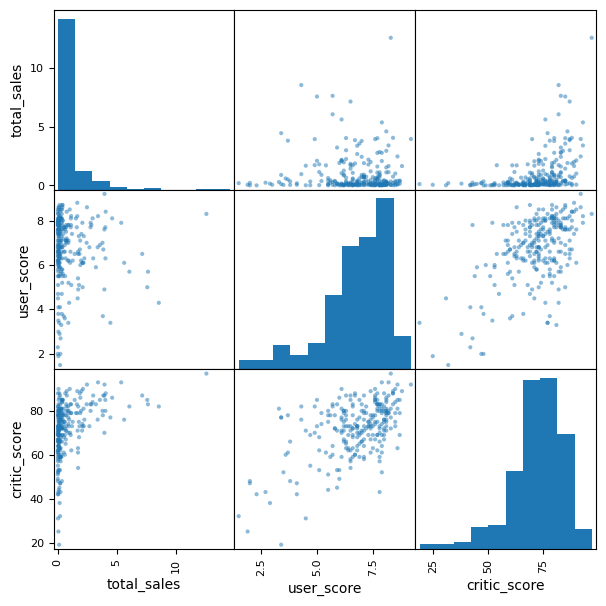

In [296]:
ps4_scatter = data_relevant[data_relevant['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']]
pd.plotting.scatter_matrix(ps4_scatter, figsize=(7, 7));

Диаграмма подтверждает ранее выявленные взаимосвязи. Проверим, справедливы ли данные выводы и для других платформ.

In [297]:
for platform in top_relevant_platform:
    print('Для платформы ', platform)
    print(data_relevant[data_relevant['platform'] == platform][['total_sales', 'user_score', 'critic_score']].corr())

Для платформы  PS4
              total_sales  user_score  critic_score
total_sales      1.000000   -0.031957      0.406568
user_score      -0.031957    1.000000      0.557654
critic_score     0.406568    0.557654      1.000000
Для платформы  PS3
              total_sales  user_score  critic_score
total_sales      1.000000   -0.005043      0.331371
user_score      -0.005043    1.000000      0.539525
critic_score     0.331371    0.539525      1.000000
Для платформы  X360
              total_sales  user_score  critic_score
total_sales      1.000000    0.006315      0.360266
user_score       0.006315    1.000000      0.557952
critic_score     0.360266    0.557952      1.000000
Для платформы  3DS
              total_sales  user_score  critic_score
total_sales      1.000000    0.198150      0.320458
user_score       0.198150    1.000000      0.721517
critic_score     0.320458    0.721517      1.000000
Для платформы  XOne
              total_sales  user_score  critic_score
total_sales      1.

Ранее сделанные выводы справедливы и для остальных платформ. В подтверждение ранее сделаного наблюдения о платформах, с меньшей степенью взаимосвязи обратим внимание PSV, для которой корреляция составляет 0,09. Для игр платформ 3DS и WiiU есть слабая корреляция отзывов пользователей - 0,20 и 0,40 соответственно. Умеренная зависимость отзывов критиков и пользователей справедлива для всех платформ.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам построив круговую диаграмму по общему числу жанров и общим продажам для каждого жанра.

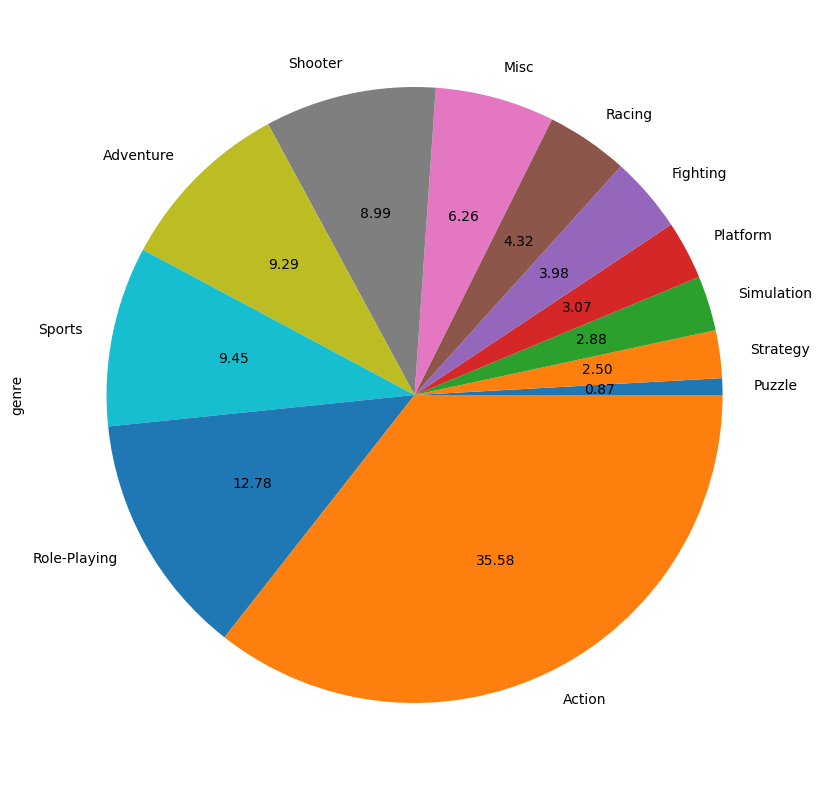

In [298]:
data_relevant.groupby('genre')['genre'].count().sort_values().plot(kind='pie', autopct="%.2f", figsize=(10, 10));

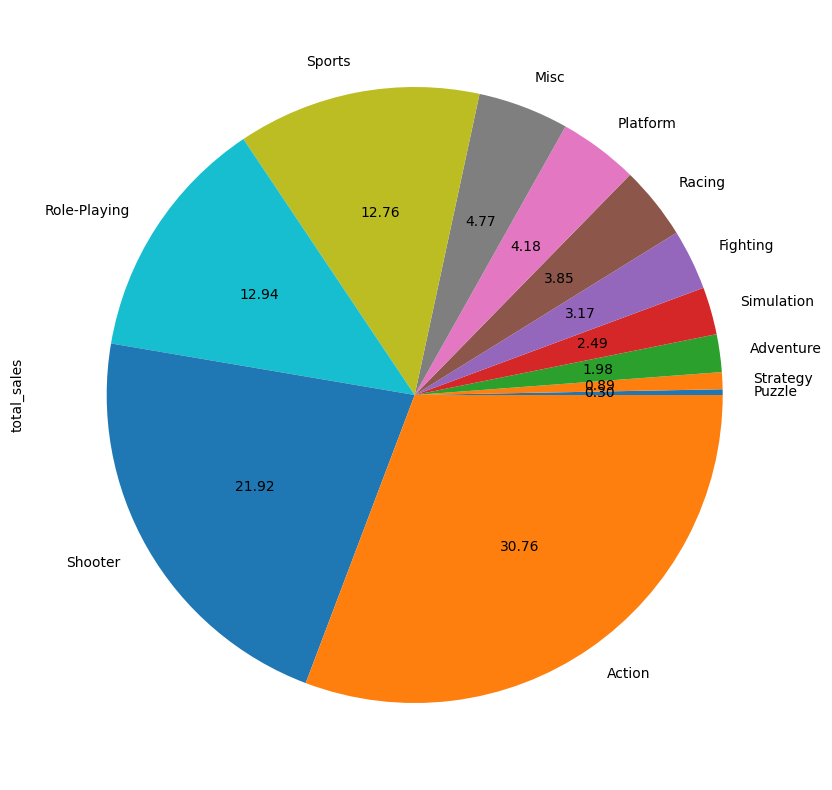

In [299]:
data_relevant.groupby('genre')['total_sales'].sum().sort_values().plot(kind='pie', autopct="%.2f", figsize=(10, 10));

Больше всего игр представлено в таких жанрах как Action (26,22%), Misc(не относящиеся к определенной категории - 12,48%) и Sports(12,03%).
Если с жанрами Action и Sports доля количества и объема продаж примерно сохраняется, то игры в жанре Shooter, вероятно, являются одними из наиболее популярных у покупателей. При общей доле игр данного жанра в 8,96% они занимают 2е место по количеству проданных копий (18,28%) от общего числа. Обратная ситуация с играми жанра Adventure, при общей доле 7,28%, доля продаж составляет лишь 2,34%.

Наименьший объем продаж у игры в жанре Puzzle и Strategy.

Рассмотри продажи по жанрам на диаграмме размаха.

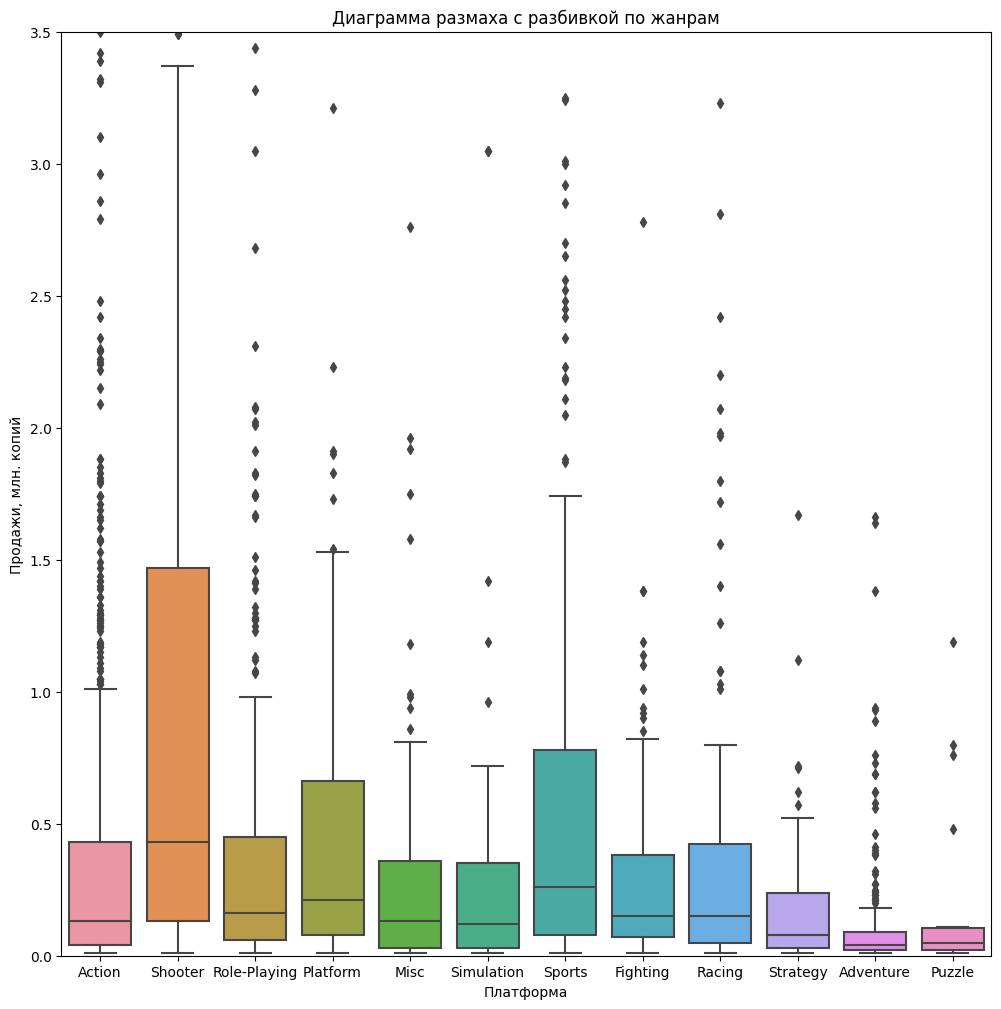

In [300]:
plt.figure(figsize=(12,12));
sns.boxplot(x=data_relevant['genre'], y=data_relevant['total_sales']);
plt.xlabel('Платформа')
plt.ylim(0, 3.5)
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграмма размаха c разбивкой по жанрам');

Как и предполагалось ранее - наибольшие медианные продажи у жанра Shooter, далее Sports и замыкает тройку лидеров Platform. При этом игры в жанре Action находятся только на 7 месте по этому показателю. Что говорит нам о наличии нескольких успешеых игр, с высокими показателями продаж. При анализе продаж по платформам выявили, что одной из замых продаваемых игр стала GTAV, которая как раз относится к жанру Action. Таким образом, общие суммы продаж в этом жарне - самые высокие, но нельзя говорить об успешности этого жанра в целом. Шутеры продаются лучше всего - 75% игр находятся в диапазоне примерно до 3,4 млн. проданых копий. У жанров Sports и Platform - 1,7 и 1,5 соответствено. Далее Action игры - чуть более 1 млн. копий, опережая ролевые игры, гонки и Fighting. Наименьшие объемы продаж Puzzle подтвердились, при этом в среднем они продаются более успешно, чем Adventure, но последнего успешных игр больше.

## Портрет пользователя каждого региона<a id='rating'></a>

Для каждого региона определим топ-5 самых популярных платформ, жанров.

In [301]:
data_relevant_region_platform = (data_relevant.pivot_table(index='platform',
                                                           values=['na_sales', 'eu_sales', 'jp_sales'],
                                                           aggfunc='sum',
                                                           margins=True, margins_name='Total'))

data_relevant_region_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.83,87.79,55.49
PC,38.13,0.00,19.20
PS3,107.27,35.29,103.74
PS4,141.09,15.96,108.74
PSV,11.36,21.04,10.98
WiiU,25.13,13.01,38.10
X360,74.89,1.57,140.57
XOne,51.59,0.34,93.12
Total,492.29,175.00,569.94


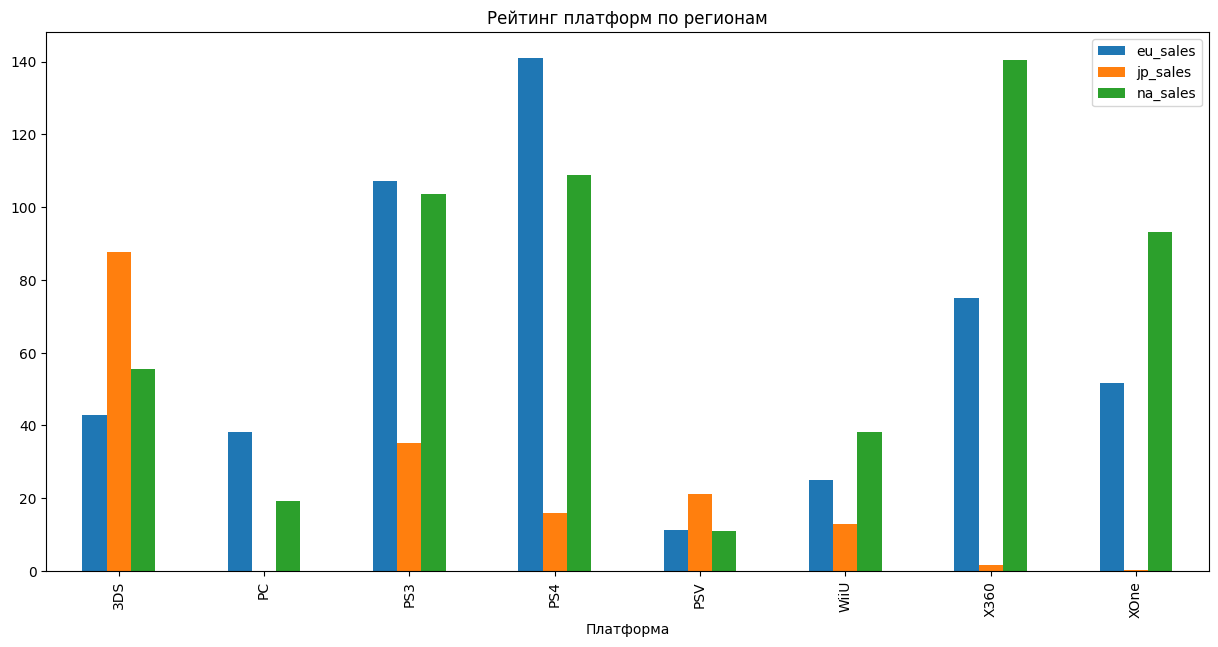

In [302]:
data_relevant_region_platform.drop('Total').plot(kind='bar',
                                                 figsize=(15, 7),
                                                 title='Рейтинг платформ по регионам', xlabel='Платформа');

Наиболее популярные платформы:
<br>Европа - Play Station 4 (141.09 млн. копий), Play Station 3 (107.27 млн. копий), Xbox 360 (74.89 млн. копий), Xbox One (51.59 млн. копий) и Nintendo 3DS (42.83 млн. копий).</br>
<br>Япония - Nintendo 3DS (87.79 млн. копий), Play Station 3 (32.29 млн. копий), PSV (21.04 млн. копий), Play Station 4 (15.96 млн. копий), WiiU (13.01 млн. копий) и . </br>
<br>Северная Америка - Xbox 360 (140.57 млн. копий), Play Station 4 (108.74 млн. копий), Play Station 3 (103.74 млн. копий), Xbox One (93.12 млн. копий) и Nintendo 3DS(55.49 млн. копий).</br>

В Северной Америке и Европе предпочитают Xbox и Play Station, в Японии предпочтение отдают карманной консоли Nintendo 3DS. В каждом из регионов платформа Play Station 4 вошла в топ-5 по объемам продаж игр, в отличае от Xbox One, вышедшей примерно в тот же период.

In [303]:
data_relevant_region_genre = (data_relevant.pivot_table(index='genre',
                                                        values=['na_sales', 'eu_sales', 'jp_sales'],
                                                        aggfunc='sum',
                                                        margins=True, margins_name='Total'))

data_relevant_region_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,156.37,48.75,172.03
Adventure,9.27,6.56,8.88
Fighting,10.79,9.08,19.79
Misc,19.37,11.35,29.36
Platform,20.14,8.63,23.96
Puzzle,1.31,1.48,1.13
Racing,27.28,2.50,17.22
Role-Playing,46.76,58.06,60.65
Shooter,113.47,9.23,144.79


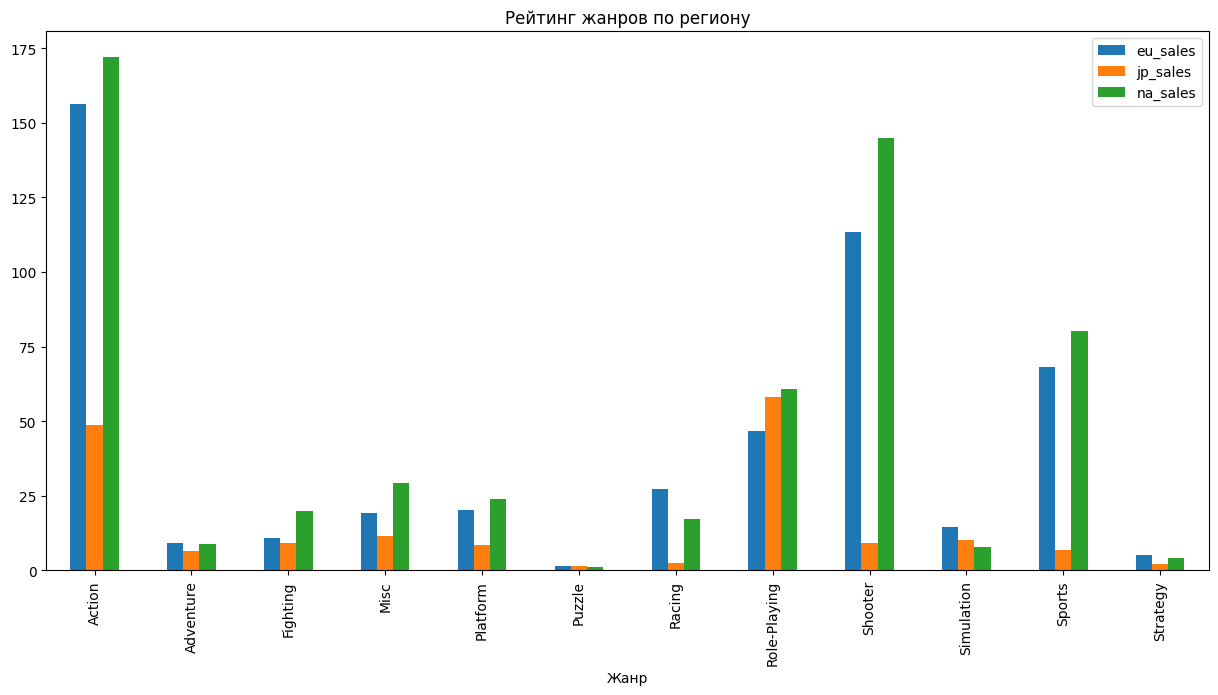

In [304]:
data_relevant_region_genre.drop('Total').plot(kind='bar',
                                                 figsize=(15, 7),
                                                 title='Рейтинг жанров по региону', xlabel='Жанр');

Наиболее популярные жанры:
<br>Европа - Action (156.37 млн. копий), Shooter (113.47	млн. копий), Sports (68.04 млн. копий), Role-Playing (46.76 млн. копий) и Racing (27.28 млн. копий).</br>
<br>Япония - Role-Playing (58.06 млн. копий), Action (48.75 млн. копий), Misc (11.35 млн. копий), Simulator (10.27 млн. копий) и Shooter (9.23 млн. копий).</br>
<br>Северная Америка - Action (172.03 млн. копий), Shooter (14.79	млн. копий), Sports (80.26 млн. копий), Role-Playing (60.65 млн. копий) и Misc (29.36 млн. копий).</br>

Что касается жанров, предпочтения покупателей из Северной Америки и Европы практически совпадают, в то время как в Японии около трети всех продаж приходится на ролевые игры.

Выясним, влияет ли рейтинг на продажи в каждом отдельном регионе.
<br>Обозначение рейтингов:
- `E` - для всех;
- `M` - страше 16 лет;
- `T` - для подростков;
- `E10+` - старше 10 лет;
- `AO` - для взрослых;
- `EC` - для детей младшего возраста;
- `RP` - рейтинг ожидается.

In [305]:
data_relevant_region_rating = (data_relevant.pivot_table(index='rating',
                                                        values=['na_sales', 'eu_sales', 'jp_sales'],
                                                        aggfunc='sum',
                                                        margins=True, margins_name='Total'))

data_relevant_region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,108.97,26.80,110.74
E10+,47.59,7.86,62.76
M,194.19,21.20,231.61
T,52.91,25.76,65.91
unknown,88.63,93.38,98.92
Total,492.29,175.00,569.94


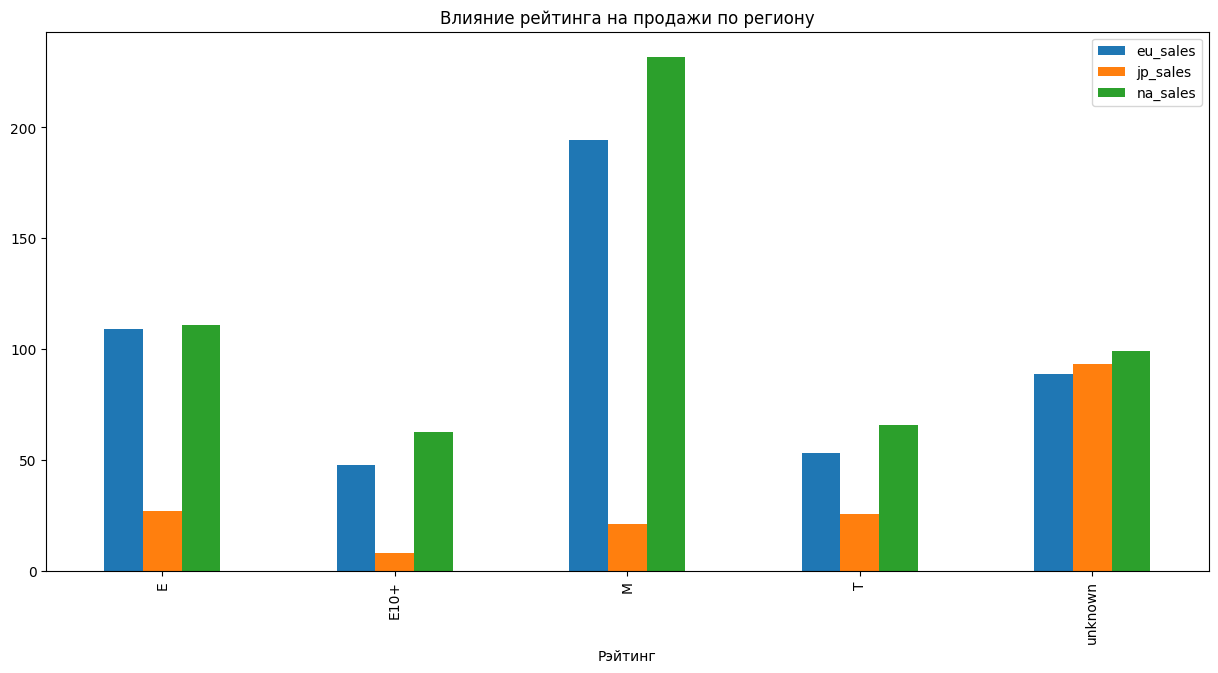

In [306]:
data_relevant_region_rating.drop('Total').plot(kind='bar',
                                                 figsize=(15, 7),
                                                 title='Влияние рейтинга на продажи по региону', xlabel='Рэйтинг');

Максимальная доля продаж как в Северной Америке, так и в Европе приходится на игры с рейтингом `M`, на втором месте игры без возрастных ограничений, на третьем - игры для подростков.
<br>В Японии максимальные продажи у игр для всех, далее игры для подростков и игры с рейтингом `M`.

Наименьшее количество продаж у игр с рейтингом `EC`.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Максимальная доля продаж как в Северной Америке, так и в Европе приходится на игры с рейтингом `M`, на втором месте игры без возрастных ограничений, на третьем - игры с неизвестным рейтинга.
<br>В Японии максимальные продажи у игр с неизвестным рейтингом, далее игры для всех игры для подростков.

Наименьшее количество продаж у игр с рейтингом `E10+`.

К играм, неизвестным рейтингом относятся игры разных жанров, платформ и годов выпуска. Выявить какую-либо закономерность не получилось. Склоняюсь к версии, что при формировании датасета произошел сбой (разная запись в разных источниках, отсутсвие данных о рейтинге в одном из них и т.п.) и часть информации не сохранилась, т.к. выборочная проверка показала, что рейтинги данным играм присвоены. Тем более, что продвижение игры без присвоенного рейтинга невозможно.

Но стоит отметить, что в Японии игры с данным рейтингом заняли бóльшую долю от проданных игр и значительно превышают объем продаж игр с иным рейтингом, что подтверждает отличие вкусов покупателей из Японии от западных. </div>

## Проверка гипотез<a id='hypothesis'></a>

Проверим две гипотезы о равенстве двух генеральных совокупностей с помощью t-теста (ttest_ind). Для подтверждения или опровержения гипотез будем ориентироваться на значение показателя p-value.

### Гипотеза 1

Сформулируем нулевую и альтернативную гипотезы:
<br>Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны"
<br>Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не равны"

In [307]:
pc = data_relevant[data_relevant['platform'] == 'PC']['user_score']
pc=pc.dropna()

xone = data_relevant[data_relevant['platform'] == 'XOne']['user_score']
xone=xone.dropna()

In [308]:
print(f'Среднее значение рейтинга для PC - {round(pc.mean(), 3)}, XboxOne - {round(xone.mean(), 3)}.')

Среднее значение рейтинга для PC - 6.436, XboxOne - 6.521.


In [309]:
print(f'Значение дисперсии для PC - {round(pc.var(), 3)}, XboxOne - {round(xone.var(), 3)}.')

Значение дисперсии для PC - 2.74, XboxOne - 1.907.


In [310]:
alpha = 0.01

results = st.ttest_ind(pc, xone, equal_var=False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5765967493790607
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает, вероятность случайно получить такое или большее различие равно почти 28%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### Гипотеза 2

Сформулируем нулевую и альтернативную гипотезы:
<br>Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"
<br>Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports не равны"

In [311]:
action = data_relevant[data_relevant['genre'] == 'Action']['user_score']
action=action.dropna()

sports = data_relevant[data_relevant['genre'] == 'Sports']['user_score']
sports=sports.dropna()

In [312]:
print(f'Среднее значение рейтинга для игр в жанре Action - {round(action.mean(), 3)}, Sports - {round(sports.mean(), 3)}')

Среднее значение рейтинга для игр в жанре Action - 6.849, Sports - 5.458


In [313]:
print(f'Значение дисперсии для игр в жанре Action - {round(action.var(), 3)}, Sports - {round(sports.var(), 3)}')

Значение дисперсии для игр в жанре Action - 1.806, Sports - 3.026


In [314]:
alpha = 0.01

results = st.ttest_ind(action, sports, equal_var=False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 3.070905094811991e-20
Отвергаем нулевую гипотезу


Полученое значение p-value показывает, вероятность случайно получить такое или большее различие сликом мала. Вероятность получить одинакове средние рейнтинги по двум жанрам практически отсутствует.

## Выводы

В рамках ознакомления с данными были выявлены моменты, требующие дальнейшего исправления и устранены неявные дубликаты.

В разделе по предобработке данных исправили названия столбцов, приведя их к нижнему регистру. Обработали пропуски, удалив 2 строки с отсутсвующими данными в столбцах `name` и `genre`, в столбце `year_of_release` частично восстановили данные, и заменили значения в столбце `user_rating` с `tbd` на NaN. Изменили типы данных в столбцах и добавили дополнительный столбец с суммой по всем регионам.

Проведя исследовательский анализ выявили, что максимальные обхемы продаж достиались в 2008 - 2009 годах. После чего это число значительно сокращается и лишь в 2014 году наблюдается рост выпускаемых игр в сравнении с предыдущим отчетным периодом. Данный спад был предположительно связан с кризисом США в 2008 году. График выпуска уникальных игр и общее число выпущенных игр имеют общую тенденцию. До 1997 года полностью дублирубт друг друга, что говорит о том, что игры выпускались под одну консоль. Начиная с 1997 графики разделяются, начинает развиваться рынок платформ, как следствие, одна и та же игра выпускается несколько раз под разные платфрмы. И к 2008 году достиганм максимальной разницы между этими показателями(одна игра - несколько выпусков под разные консоли). Если смотреть по графику выпуска уникальных игр, то спад после 2009 года происходил поавнее, чем на графике по общему количеству, но тенденция на сокращение выпуска игр после 2011 года видна на обоих графиках.

Наибольшее число продаж у платформ Play Station 2, Xbox 360, Play Station 3. При этом можно считать платформу Play Station одной из наиболее успешных. Спустя почти 13 лет с моменты выхода последней игры она по прежнему держится в топ 6 по общему числу проданых игр.

Средняя продолжительность жизни платформы - около 9 - 10 лет. В вязи с этим наблюдением дальнейший анализ выполняли по данным за последние 8 лет. На сегодняшний день актуальными платформами можно считать Play Station 4 и Xbox One. Nintendo 3DS занимает третье место по объемам продаж, но принимая во внимание средний срок "жизни" консоли, находится на завершающем этапе этого цикла.

Наибольшее медианное значение количества проданных копий игр у платформы Xbox 360, чуть-чуть отстает Play Station 3, Xbox One, Play Station 4 и The Wii. Наибольшее количество "удачных" игр также у Xbox 360, затем, не смотря на недавний релиз платформы - Play Station 4, затем Play Station 3 и Xbox One. Если рассмотривать только 50% от проданных игр, попадающих между Q1 и Q2, то и в этом случае максималные показатели у Xbox 360 и Play Station 4, но у Xbox 360 успешных игр немного больше.
По всем параметрам наименьшие показатели у PC.

Выявлено, что существует взаимосвязь между отзывами критиков и продажами, а также между отзывами критиков и покупателями. При этом корреляция между отзывами покупателей и продажами практически отсутствует. Но встречаются и исключения - платформы 3DS и WiiU, у которых прослеживается небольшая корреляция отзывов покупателей и продаж.

Больше всего игр представлено в таких жанрах как Action (26,22%), Misc(не относящиеся к определенной категории - 12,48%) и Sports(12,03%). Если с жанрами Action и Sports доля количества и объема продаж примерно сохраняется, то игры в жанре Shooter, вероятно, являются одними из наиболее популярных у покупателей. При общей доле игр данного жанра в 8,96% они занимают 2е место по количеству проданных копий (18,28%) от общего числа. Наибольшие медианные продажи у жанра Shooter, далее Sports и замыкает тройку лидеров Platform. При этом игры в жанре Action находятся только на 7 месте по этому показателю. Что говорит нам о наличии нескольких успешеых игр, с высокими показателями продаж. При анализе продаж по платформам выявили, что одной из замых продаваемых игр стала GTAV, которая как раз относится к жанру Action. Таким образом, общие суммы продаж в этом жарне - самые высокие, но нельзя говорить об успешности этого жанра в целом. Шутеры продаются лучше всего - 75% игр находятся в диапазоне примерно до 3,4 млн. проданых копий. У жанров Sports и Platform - 1,7 и 1,5 соответствено. Далее Action игры - чуть более 1 млн. копий, опережая ролевые игры, гонки и Fighting. Наименьшие объемы продаж Puzzle подтвердились, при этом в среднем они продаются более успешно, чем Adventure, но последнего успешных игр больше.

В Северной Америке и Европе предпочитают жанры Action, Shooter и Sports. В Японии - Role-Playing, Action и Misc.
<br>Среди платформ в Северной Америке и Европе лидируют - Xbox и Play Station 3. В Японии  - карманный Nintendo 3DS, которому принадлежит около половины проданных игр, далее, со значительным отставанием Play Station 3 и Nintendo DS. Такое отличие предпочтений покупателя из Японии от покупателей их Европы и Америки, вероятнее всего, связано со значительными отличаями в образе жизни и культурных традициях. В каждом из регионов платформа Play Station 4 вошла в топ-5 по объемам продаж игр, в отличае от Xbox One, вышедшей примерно в тот же период.
<br>Самые часто продающиеся игры - M (для всех, старше 16 лет), E (для всех) и игры, рейтинг для которых неизвестен. При этом в Америке и Европе рапспределения данного рейтинга совпадают, тогда как в Японии распределение отличается (Unknown, E, T). Игры с рейтингом E10+ (для детей старше 10) имеют самые низкие показатели во всех регионах.

Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC опровергнуть не получилось.
<br>Гипотеза о равенстве средних пользовательских рейтинги жанров Action и Sports отвергнута.

